In [1]:
%pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import math

In [3]:
df_diversitate = pd.read_csv('Diversitate.csv')
df_cod_local = pd.read_csv('Coduri_Localitati.csv')

In [4]:
df_diversitate

,Siruta,Localitate,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1017,Municipiul Alba Iulia,0.68835,0.68256,0.69068,0.68005,0.69105,0.67940,0.67947,0.68413,0.66930,0.66945,0.67122,0.67827,0.68474,0.68714
1,1071,Ciugud,0.41717,0.40792,0.42250,0.41939,0.41051,0.42315,0.43189,0.45149,0.48199,0.47492,0.40261,0.41116,0.43488,0.45948
2,1151,Oras Abrud,0.35267,0.42373,0.38825,0.37580,0.38027,0.37134,0.36100,0.35039,0.35722,0.35895,0.35299,0.34369,0.33086,0.33038
3,1213,Municipiul Aiud,0.54531,0.55885,0.59457,0.58634,0.57833,0.60098,0.60055,0.58780,0.59164,0.59529,0.59948,0.59846,0.61335,0.60405
4,1348,Municipiul Blaj,0.47315,0.52496,0.50509,0.48633,0.49722,0.49742,0.46477,0.43227,0.42936,0.38590,0.35862,0.36965,0.37592,0.37121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,180037,Boghis,0.16093,0.25803,0.21151,0.22758,0.21736,0.26038,0.25683,0.26897,0.27790,0.24681,0.26005,0.26853,0.26545,0.25884
3177,180046,Gura Ialomitei,0.25036,0.31319,0.28954,0.27989,0.28375,0.26296,0.27129,0.27516,0.27582,0.24337,0.26222,0.31883,0.28654,0.30607
3178,180055,Crivat,0.10645,0.03277,0.18250,0.16521,0.16828,0.11390,0.04530,0.15958,0.12240,0.23668,0.32959,0.34662,0.36439,0.50215
3179,180064,Barbulesti,0.09949,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.20750,0.16199,0.20761,0.09917,0.08761,0.08759


In [5]:
df_cod_local

,Siruta,Localitate,Judet
0,1017,Municipiul Alba Iulia,ab
1,1071,Ciugud,ab
2,1151,Oras Abrud,ab
3,1213,Municipiul Aiud,ab
4,1348,Municipiul Blaj,ab
...,...,...,...
3176,180037,Boghis,sj
3177,180046,Gura Ialomitei,il
3178,180055,Crivat,cl
3179,180064,Barbulesti,il


### 1_ localitati cu diversitatea 0


In [6]:
df_loc_gasite = df_diversitate[df_diversitate.iloc[:, 2:] == 0].dropna(how='all')
index = df_loc_gasite.index.values
df_diversitate.iloc[index]

,Siruta,Localitate,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
17,3397,Blandiana,0.24060,0.24268,0.13994,0.16815,0.19027,0.19834,0.12407,0.12404,0.16195,0.08761,0.00000,0.00000,0.00000,0.00000
21,3841,Ceru-Bacainti,0.27042,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.33120,0.00000
36,4981,Intregalde,0.12483,0.00000,0.00000,0.00000,0.00000,0.00000,0.05870,0.00000,0.07018,0.08761,0.09324,0.00000,0.10486,0.03485
47,6119,Ocolis,0.00000,0.00000,0.16203,0.09920,0.15766,0.23637,0.20793,0.25224,0.23479,0.19474,0.16455,0.21777,0.30914,0.25752
48,6164,Ohaba,0.00000,0.00000,0.00000,0.00000,0.14898,0.12313,0.10952,0.19359,0.19605,0.15262,0.19763,0.23599,0.24071,0.21482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,179917,Rau Alb,0.10791,0.00000,0.08764,0.09920,0.09922,0.09917,0.09917,0.15754,0.15236,0.13906,0.13366,0.15152,0.15733,0.18413
3170,179971,Colelia,0.10478,0.00000,0.07810,0.07022,0.00000,0.11461,0.13990,0.13037,0.11458,0.14026,0.18904,0.14805,0.13517,0.20045
3172,179999,Moldoveni,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.10802,0.16199,0.20717,0.10797
3174,180019,Sarateni,0.00000,0.05636,0.06391,0.12957,0.11389,0.12757,0.20389,0.10434,0.12226,0.04655,0.06815,0.08849,0.10602,0.14497


### 2_ 


In [7]:
df_merge = df_diversitate.merge(df_cod_local[['Siruta', 'Judet']], left_on='Siruta', right_on='Siruta')
df_merge

,Siruta,Localitate,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Judet
0,1017,Municipiul Alba Iulia,0.68835,0.68256,0.69068,0.68005,0.69105,0.67940,0.67947,0.68413,0.66930,0.66945,0.67122,0.67827,0.68474,0.68714,ab
1,1071,Ciugud,0.41717,0.40792,0.42250,0.41939,0.41051,0.42315,0.43189,0.45149,0.48199,0.47492,0.40261,0.41116,0.43488,0.45948,ab
2,1151,Oras Abrud,0.35267,0.42373,0.38825,0.37580,0.38027,0.37134,0.36100,0.35039,0.35722,0.35895,0.35299,0.34369,0.33086,0.33038,ab
3,1213,Municipiul Aiud,0.54531,0.55885,0.59457,0.58634,0.57833,0.60098,0.60055,0.58780,0.59164,0.59529,0.59948,0.59846,0.61335,0.60405,ab
4,1348,Municipiul Blaj,0.47315,0.52496,0.50509,0.48633,0.49722,0.49742,0.46477,0.43227,0.42936,0.38590,0.35862,0.36965,0.37592,0.37121,ab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,180037,Boghis,0.16093,0.25803,0.21151,0.22758,0.21736,0.26038,0.25683,0.26897,0.27790,0.24681,0.26005,0.26853,0.26545,0.25884,sj
3177,180046,Gura Ialomitei,0.25036,0.31319,0.28954,0.27989,0.28375,0.26296,0.27129,0.27516,0.27582,0.24337,0.26222,0.31883,0.28654,0.30607,il
3178,180055,Crivat,0.10645,0.03277,0.18250,0.16521,0.16828,0.11390,0.04530,0.15958,0.12240,0.23668,0.32959,0.34662,0.36439,0.50215,cl
3179,180064,Barbulesti,0.09949,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.20750,0.16199,0.20761,0.09917,0.08761,0.08759,il


In [8]:
df_merge['medie'] = df_merge.iloc[:, 2:-2].sum(axis=1) / df_merge.iloc[:, 2:-2].shape[1]
df_merge

,Siruta,Localitate,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Judet,medie
0,1017,Municipiul Alba Iulia,0.68835,0.68256,0.69068,0.68005,0.69105,0.67940,0.67947,0.68413,0.66930,0.66945,0.67122,0.67827,0.68474,0.68714,ab,0.680667
1,1071,Ciugud,0.41717,0.40792,0.42250,0.41939,0.41051,0.42315,0.43189,0.45149,0.48199,0.47492,0.40261,0.41116,0.43488,0.45948,ab,0.429968
2,1151,Oras Abrud,0.35267,0.42373,0.38825,0.37580,0.38027,0.37134,0.36100,0.35039,0.35722,0.35895,0.35299,0.34369,0.33086,0.33038,ab,0.365166
3,1213,Municipiul Aiud,0.54531,0.55885,0.59457,0.58634,0.57833,0.60098,0.60055,0.58780,0.59164,0.59529,0.59948,0.59846,0.61335,0.60405,ab,0.588535
4,1348,Municipiul Blaj,0.47315,0.52496,0.50509,0.48633,0.49722,0.49742,0.46477,0.43227,0.42936,0.38590,0.35862,0.36965,0.37592,0.37121,ab,0.446205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,180037,Boghis,0.16093,0.25803,0.21151,0.22758,0.21736,0.26038,0.25683,0.26897,0.27790,0.24681,0.26005,0.26853,0.26545,0.25884,sj,0.244641
3177,180046,Gura Ialomitei,0.25036,0.31319,0.28954,0.27989,0.28375,0.26296,0.27129,0.27516,0.27582,0.24337,0.26222,0.31883,0.28654,0.30607,il,0.277917
3178,180055,Crivat,0.10645,0.03277,0.18250,0.16521,0.16828,0.11390,0.04530,0.15958,0.12240,0.23668,0.32959,0.34662,0.36439,0.50215,cl,0.182590
3179,180064,Barbulesti,0.09949,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.20750,0.16199,0.20761,0.09917,0.08761,0.08759,il,0.066413


In [9]:
def group_function(df:pd.DataFrame):
    print(df)
    print('===========')
    df['medie'].idxmax(axis=0)

In [10]:
df_group = df_merge.groupby('Judet')['medie'].idxmax()

df_found = df_merge.iloc[df_group]
df_found

,Siruta,Localitate,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Judet,medie
0,1017,Municipiul Alba Iulia,0.68835,0.68256,0.69068,0.68005,0.69105,0.67940,0.67947,0.68413,0.66930,0.66945,0.67122,0.67827,0.68474,0.68714,ab,0.680667
156,13169,Municipiul Pitesti,0.62837,0.64677,0.67479,0.68607,0.67858,0.68580,0.67765,0.66415,0.66059,0.57100,0.66199,0.66230,0.66171,0.65915,ag,0.658444
78,9262,Municipiul Arad,0.70344,0.70670,0.71258,0.71044,0.70070,0.70309,0.68800,0.68535,0.68489,0.68061,0.67983,0.68717,0.70698,0.70077,ar,0.696137
3120,179132,Municipiul Bucuresti,0.77957,0.76371,0.77033,0.77826,0.77722,0.77629,0.77684,0.77820,0.77544,0.77540,0.77571,0.77711,0.77326,0.77105,b,0.775180
258,20297,Municipiul Bacau,0.69754,0.69110,0.70066,0.69568,0.68690,0.67749,0.66354,0.65927,0.65294,0.64019,0.63939,0.63207,0.61997,0.61814,bc,0.665903
351,26564,Municipiul Oradea,0.72928,0.74378,0.72832,0.73194,0.73395,0.72983,0.73275,0.73210,0.73496,0.73408,0.73685,0.74104,0.74068,0.73627,bh,0.734582
452,32394,Municipiul Bistrita,0.66184,0.54874,0.63965,0.66859,0.66961,0.65277,0.62786,0.61060,0.60502,0.60942,0.63710,0.63410,0.64466,0.64304,bn,0.631535
645,42682,Municipiul Braila,0.66116,0.66733,0.69031,0.68790,0.68542,0.67897,0.67622,0.67946,0.68338,0.69347,0.68892,0.69329,0.69667,0.71707,br,0.683269
509,35731,Municipiul Botosani,0.63248,0.59180,0.66244,0.66187,0.63489,0.65443,0.64368,0.63888,0.63796,0.63154,0.64030,0.64602,0.64479,0.65015,bt,0.640083
587,40198,Municipiul Brasov,0.76245,0.75293,0.75842,0.75997,0.75705,0.75098,0.74107,0.73534,0.73335,0.72289,0.72345,0.72728,0.72757,0.71978,bv,0.742519


In [11]:
df_diversitate

,Siruta,Localitate,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1017,Municipiul Alba Iulia,0.68835,0.68256,0.69068,0.68005,0.69105,0.67940,0.67947,0.68413,0.66930,0.66945,0.67122,0.67827,0.68474,0.68714
1,1071,Ciugud,0.41717,0.40792,0.42250,0.41939,0.41051,0.42315,0.43189,0.45149,0.48199,0.47492,0.40261,0.41116,0.43488,0.45948
2,1151,Oras Abrud,0.35267,0.42373,0.38825,0.37580,0.38027,0.37134,0.36100,0.35039,0.35722,0.35895,0.35299,0.34369,0.33086,0.33038
3,1213,Municipiul Aiud,0.54531,0.55885,0.59457,0.58634,0.57833,0.60098,0.60055,0.58780,0.59164,0.59529,0.59948,0.59846,0.61335,0.60405
4,1348,Municipiul Blaj,0.47315,0.52496,0.50509,0.48633,0.49722,0.49742,0.46477,0.43227,0.42936,0.38590,0.35862,0.36965,0.37592,0.37121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,180037,Boghis,0.16093,0.25803,0.21151,0.22758,0.21736,0.26038,0.25683,0.26897,0.27790,0.24681,0.26005,0.26853,0.26545,0.25884
3177,180046,Gura Ialomitei,0.25036,0.31319,0.28954,0.27989,0.28375,0.26296,0.27129,0.27516,0.27582,0.24337,0.26222,0.31883,0.28654,0.30607
3178,180055,Crivat,0.10645,0.03277,0.18250,0.16521,0.16828,0.11390,0.04530,0.15958,0.12240,0.23668,0.32959,0.34662,0.36439,0.50215
3179,180064,Barbulesti,0.09949,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.20750,0.16199,0.20761,0.09917,0.08761,0.08759


In [12]:
df_numerical = df_diversitate.select_dtypes(include='number')
df_numerical.drop('Siruta', inplace=True, axis=1)

In [13]:
df_numerical

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0.68835,0.68256,0.69068,0.68005,0.69105,0.67940,0.67947,0.68413,0.66930,0.66945,0.67122,0.67827,0.68474,0.68714
1,0.41717,0.40792,0.42250,0.41939,0.41051,0.42315,0.43189,0.45149,0.48199,0.47492,0.40261,0.41116,0.43488,0.45948
2,0.35267,0.42373,0.38825,0.37580,0.38027,0.37134,0.36100,0.35039,0.35722,0.35895,0.35299,0.34369,0.33086,0.33038
3,0.54531,0.55885,0.59457,0.58634,0.57833,0.60098,0.60055,0.58780,0.59164,0.59529,0.59948,0.59846,0.61335,0.60405
4,0.47315,0.52496,0.50509,0.48633,0.49722,0.49742,0.46477,0.43227,0.42936,0.38590,0.35862,0.36965,0.37592,0.37121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,0.16093,0.25803,0.21151,0.22758,0.21736,0.26038,0.25683,0.26897,0.27790,0.24681,0.26005,0.26853,0.26545,0.25884
3177,0.25036,0.31319,0.28954,0.27989,0.28375,0.26296,0.27129,0.27516,0.27582,0.24337,0.26222,0.31883,0.28654,0.30607
3178,0.10645,0.03277,0.18250,0.16521,0.16828,0.11390,0.04530,0.15958,0.12240,0.23668,0.32959,0.34662,0.36439,0.50215
3179,0.09949,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.20750,0.16199,0.20761,0.09917,0.08761,0.08759


In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)
df_scaled


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3.241806,3.194328,3.191422,3.080470,3.142934,3.052364,3.057928,3.051452,2.924375,2.914588,2.889611,2.932161,2.959583,2.950947
1,1.138291,1.072056,1.105842,1.056575,0.970391,1.050181,1.108482,1.209784,1.419977,1.337602,0.696111,0.722135,0.867955,1.029144
2,0.637971,1.194228,0.839487,0.718120,0.736208,0.645369,0.550294,0.409437,0.417875,0.397474,0.290908,0.163899,-0.002817,-0.060660
3,2.132260,2.238363,2.443995,2.352858,2.270014,2.439637,2.436511,2.288867,2.300641,2.313399,2.303773,2.271826,2.361963,2.249539
4,1.572522,1.976479,1.748128,1.576331,1.641886,1.630482,1.367380,1.057631,0.997274,0.615948,0.336883,0.378688,0.374389,0.284009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,-0.849335,-0.086214,-0.534983,-0.432734,-0.525390,-0.221606,-0.269940,-0.235115,-0.219190,-0.511606,-0.468051,-0.457963,-0.550377,-0.664568
3177,-0.155636,0.340033,0.071840,-0.026573,-0.011257,-0.201447,-0.156082,-0.186113,-0.235896,-0.539493,-0.450330,-0.041789,-0.373829,-0.265874
3178,-1.271931,-1.826903,-0.760587,-0.917006,-0.905473,-1.366112,-1.935528,-1.101089,-1.468103,-0.593726,0.099821,0.188141,0.277869,1.389345
3179,-1.325919,-2.080132,-2.179852,-2.199779,-2.208658,-2.256058,-2.292220,-2.364386,-0.784615,-1.199212,-0.896282,-1.859221,-2.039112,-2.110183


In [18]:
fa = FactorAnalyzer(rotation='Varimax')
fa.fit(df_scaled)

eigenvector, eigenvalue = fa.get_eigenvalues()
n_factors = sum(eigenvalue > 1)
n_factors

1

In [28]:
fa = FactorAnalyzer(rotation='Varimax', n_factors=3)
fa.fit(df_scaled)

variance = fa.get_factor_variance()
#variance[0] --> loadings per factor
#variance[1] --> explained_variance per factor
#variance[2] --> cumulative variance per 
variance

(array([5.5707129 , 5.44175018, 2.13075493]),
 array([0.39790806, 0.38869644, 0.15219678]),
 array([0.39790806, 0.78660451, 0.93880129]))

### 4_ Corr matrix

In [43]:
loadings = fa.loadings_
loadings

array([[0.46373652, 0.79931796, 0.22765359],
       [0.45853967, 0.79819   , 0.22514811],
       [0.46178341, 0.7811899 , 0.31636742],
       [0.46648548, 0.75669329, 0.38069843],
       [0.49325533, 0.70703557, 0.43941887],
       [0.51464726, 0.65687867, 0.49940336],
       [0.53676778, 0.61753044, 0.5363065 ],
       [0.59859136, 0.55872185, 0.52618135],
       [0.6547504 , 0.52391801, 0.49377546],
       [0.71421817, 0.49424333, 0.43430263],
       [0.77218142, 0.4687777 , 0.36844176],
       [0.81261471, 0.46362596, 0.29962327],
       [0.83839055, 0.45240583, 0.23472263],
       [0.81341563, 0.44704513, 0.25136071]])

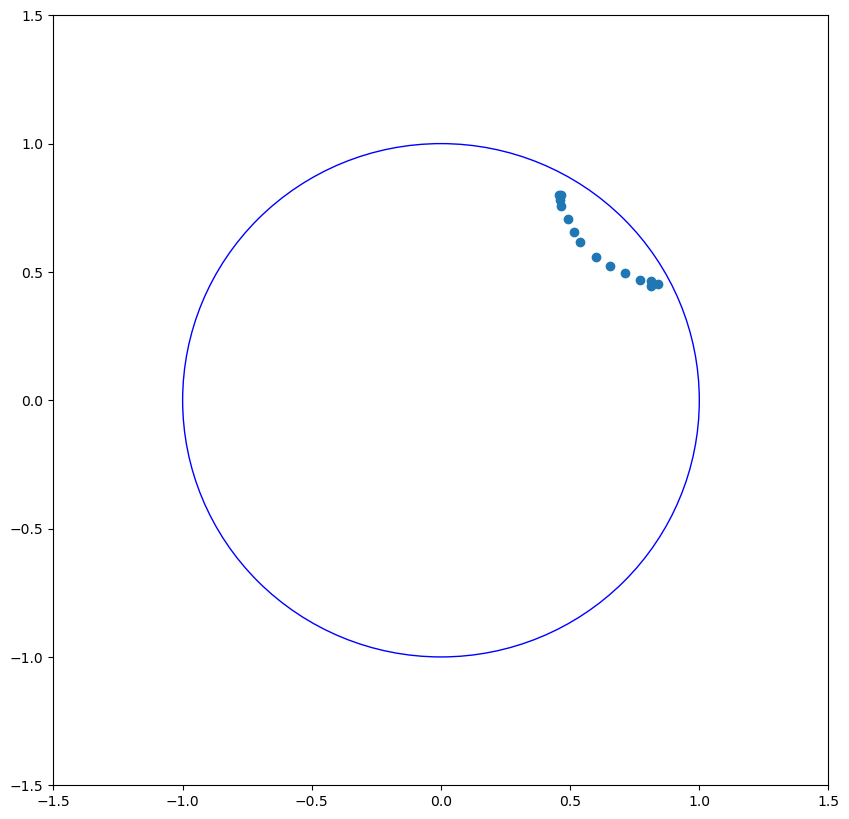

In [71]:
plt.figure(figsize=(10,10))
cerc = plt.Circle((0,0), 1, fill=False, color='blue')
plt.gca().add_patch(cerc)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.scatter(loadings[:, 0], loadings[:, 1])
plt.show()